# Make a Pie Chart of Macronutrition from Food Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import lxml
import html5lib
import requests
import urllib.request
from bs4 import BeautifulSoup
import re

In [7]:
#Webscraping data table
url = "https://tools.myfooddata.com/nutrition-facts.php?food=170567&serv=wt5&qty=1"
#send request
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
table_elem = soup.find_all('tr') #table elements in html start with tr class

#read table from website and save data in an array
tablee = []
for i in range(len(table_elem)):
    item = table_elem[i]
    if i <= 19:
        #split data at numbers, include decimal points
        tablee.append(list(filter(None, re.split(r'(\d*\.?\d+)', item.text))))
#print(tablee)

In [8]:
#make a dataframe from array
colnams = 'Name Amount Unit DV % none'.split()
print(colnams)
df = pd.DataFrame(tablee, columns=colnams)
servings=pd.to_numeric(df.iloc[2][4])#serving size needed for calculation by mass
df.drop([0,1,2,3, 5], inplace=True)
df.set_index('Name', inplace = True)
df

['Name', 'Amount', 'Unit', 'DV', '%', 'none']


,Amount,Unit,DV,%,none
Name,,,,,
Calories,164,None,None,None,None
Total Fat,14.2,g,22,%,None
Saturated Fat,1.1,g,5,%,None
Trans Fat,0,g,None,None,None
Cholesterol,0,mg,0,%,None
Sodium,0.3,mg,0,%,None
Total Carbohydrate,6.1,g,2,%,None
Dietary Fiber,3.6,g,14,%,None
Total Sugars,1.2,g,2,%,None


In [11]:
df['Amount']= pd.to_numeric(df['Amount']) #change data read as string to numeric
print(df.index)

Index(['Calories', 'Total Fat ', 'Saturated Fat ', 'Trans Fat ',
       'Cholesterol ', 'Sodium ', 'Total Carbohydrate ', 'Dietary Fiber ',
       'Total Sugars ', 'Protein ', 'Vitamin D ', 'Iron ', 'Calcium ',
       'Potassium ', 'Phosphorus '],
      dtype='object', name='Name')


In [12]:
#make a function that takes our dataframe and outputs macronutrient composition
def macros(df):
    """Input a dataframe that has the indices: Dietary Fiber , Total Fat , Total Carbohydrate , and Protein .
    Calculates Calories as 9*fat + 4*Net Carbs + 4*Protein where net carbs are total carbs - fiber. 
    Shows the calorie contribution of each fat, net carbs, and protein out of the total calories.
    """
    fiber = df.loc['Dietary Fiber '][0]
    f=df.loc['Total Fat '][0]
    c=df.loc['Total Carbohydrate '][0]
    p=df.loc['Protein '][0]
    #cal=df.loc['Calories'][0]
    cal = f * 9 + (c-fiber) * 4 + p * 4 #more consistent, makes it out of 1
    
    fat= f * 9 / cal
    carb= (c-fiber) * 4 / cal
    prot= p * 4 / cal
    #water = (servings - ( f+c+p)) / servings #need to add micronutrients
    return ( fat,carb,prot)

macros(df)

(0.7898640296662547, 0.061804697156983925, 0.14833127317676145)

([<matplotlib.patches.Wedge at 0x137ac474198>,
 [Text(-0.735893505080146, -0.9478716944718085, 'fat'),
  Text(1.0833196647949612, 0.5161574409698393, 'carbs'),
  Text(0.539176048635261, 1.0720490607141386, 'protein')],
 [Text(-0.4292712112967517, -0.5529251551085549, '79.0%'),
  Text(0.631936471130394, 0.30109184056573957, '6.2%'),
  Text(0.31451936170390227, 0.6253619520832474, '14.8%')])

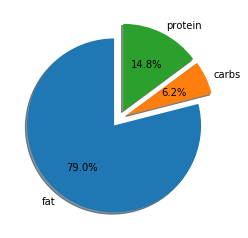

In [13]:
#Data Visualization of the macronutrition in a pie chart
plt.pie(macros(df), startangle=90, shadow=True, explode = (0.1, 0.1, 0.1), 
        labels = ('fat', 'carbs', 'protein'), autopct='%1.1f%%')

# Health Tool Calculators from Data Input by User

In [14]:
def bmi(h,w, units = 'pounds, inches'):
    """ Input units = 'kilograms, meters' for metric """
    if units == 'pounds, inches':
        return(703 * w / (h)**2)
    if units == 'kilograms, meters':
        return(w / h**2)

In [15]:
def bmr(h,w,g,age, method = 1):
    """ Enter 'male' or 'female' for gender. Enter weight in pounds, height in inches.
        Method 1 uses the Revised Harris-Benedict Equation, Method 2 uses The Mifflin St Jeor Equation"""
    #conversion of pounds to kg and cm to inches
    w = 0.453592 * w
    h = 2.54 * h
    if method == 1:
        if g == 'male':
            BMR = 88.362 + 13.397*w + 4.799*h - 5.677*age
        elif g == 'female':
            BMR = 447.593 + 9.247*w + 3.098*h - 4.330*age
    if method == 2:
        if g == 'male':
            BMR = 10*w + 6.25*h - 5*age + 5
        elif g == 'female':
            BMR = 10*w + 6.25*h - 5*age - 161
    return (BMR)

In [16]:
#this will ask you line by line to input weight, height, age, gender and outputs BMI and BMR
weight = float(input("Weight (lbs): "))
height = float(input('Height (in): '))
age = float(input('Age (years): '))
gender = input('Gender (male or female): ')
print('Your BMI:' + str(bmi(height,weight)))
print('Your BMR:' + str(bmr(height,weight, gender, age, method = 2)))
goal_weight = float(input('Goal Weight: '))
print('Goal BMI:' + str(bmi(height,goal_weight)))

Weight (lbs): 150
Height (in): 70
Age (years): 26
Gender (male or female): male
Your BMI:21.520408163265305
Your BMR:1666.638
Goal Weight: 145
Goal BMI:20.803061224489795


In [ ]:
#output maximum daily calories, and macros depending on diet. 
#output percent error from macros?
#output time it would take to reach a desired weight eating only this food?
#include rough body fat percent/lean muscle mass
#show BMI, BMR, with calories used for minimal daily movement
#input target macros ex type = keto or balanced by default
#input a food and shows how far it deviates from your macros, weighted by calories

In [ ]:
from ipywidgets import widgets
from IPython.display import display
text = widgets.Text()
display(text)
def handle_submit(sender):
    print(text.value)
    
x = text.on_submit(handle_submit)
weight = float(text.value)
print(weight*2)